In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/vrunda/NLP/FAKE-NEWS-CLASSIFIER/fake-news/train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
x=df.drop('label',axis=1)
y=df['label']


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:
df=df.dropna()
messages=df.copy()
messages.reset_index(inplace=True)

In [10]:
# Data preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]

for i in range(len(messages)):
    review=re.sub("[^a-zA-Z]"," ",messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word)for word in review if not word in stopwords.words('english')]
    
    review=" ".join(review)
    corpus.append(review)

In [12]:
# applying bag of words

from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [13]:
y=messages['label']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [15]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [16]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [17]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())

In [18]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    
    if  normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
        print('Normalized Confusion Matrix')
     
    else:
        print('Confusion Matrix without Normalization')
        
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
        horizontalalignment='center',color='white' if cm[i,j]>thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinominalnb algorithm

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [21]:
from sklearn import metrics
import itertools

0.8810273405136703
Confusion Matrix without Normalization


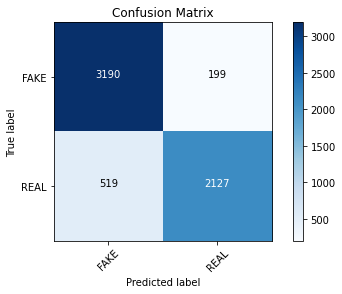

In [22]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print(score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

# MultinomialNB with hyper parameter tunning

In [23]:
classifier=MultinomialNB(alpha=0.1)

In [24]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {},Score:{}".format(alpha,score))

C:\Users\vrunda\anaconda3\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0,Score:0.8662800331400166
Alpha: 0.1,Score:0.8777133388566695
Alpha: 0.2,Score:0.8801988400994201
Alpha: 0.30000000000000004,Score:0.87986743993372
Alpha: 0.4,Score:0.8808616404308203
Alpha: 0.5,Score:0.8806959403479702
Alpha: 0.6000000000000001,Score:0.8815244407622204
Alpha: 0.7000000000000001,Score:0.8813587406793704
Alpha: 0.8,Score:0.8816901408450705
Alpha: 0.9,Score:0.8816901408450705


In [25]:
# get_features_names
feature_names=cv.get_feature_names()

In [26]:
classifier.coef_[0]

C:\Users\vrunda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-8.79747339, -8.50390794, -8.86748348, ..., -9.89972258,
       -8.39148017, -9.09223723])

In [27]:
## most real
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[:20]

[(-4.95403355506985, 'hillari'),
 (-4.9851438138104776, 'trump'),
 (-5.093967770783891, 'clinton'),
 (-5.406224434792623, 'elect'),
 (-5.720704731812888, 'video'),
 (-5.773549474756074, 'comment'),
 (-5.796370993571742, 'war'),
 (-5.813919655860566, 'us'),
 (-5.886315118097155, 'fbi'),
 (-5.887681855526013, 'hillari clinton'),
 (-5.937650910283555, 'vote'),
 (-5.955192196052632, 'world'),
 (-6.040948488999476, 'email'),
 (-6.133757591036377, 'obama'),
 (-6.144495883768216, 'america'),
 (-6.164714961804142, 'russia'),
 (-6.228464630593834, 'day'),
 (-6.234273085996778, 'american'),
 (-6.288053898708686, 'break'),
 (-6.312960141736546, 'presid')]

In [28]:
## most fake
sorted(zip(classifier.coef_[0],feature_names))[:5000]

[(-9.899722583188804, 'abe'),
 (-9.899722583188804, 'abroad'),
 (-9.899722583188804, 'abus new'),
 (-9.899722583188804, 'abus new york'),
 (-9.899722583188804, 'act new'),
 (-9.899722583188804, 'act new york'),
 (-9.899722583188804, 'advic'),
 (-9.899722583188804, 'advis new'),
 (-9.899722583188804, 'advis new york'),
 (-9.899722583188804, 'age new'),
 (-9.899722583188804, 'age new york'),
 (-9.899722583188804, 'agenda breitbart'),
 (-9.899722583188804, 'ail'),
 (-9.899722583188804, 'aleppo new'),
 (-9.899722583188804, 'aleppo new york'),
 (-9.899722583188804, 'ali'),
 (-9.899722583188804, 'america breitbart'),
 (-9.899722583188804, 'america new york'),
 (-9.899722583188804, 'american breitbart'),
 (-9.899722583188804, 'american new'),
 (-9.899722583188804, 'american new york'),
 (-9.899722583188804, 'ami'),
 (-9.899722583188804, 'ami schumer'),
 (-9.899722583188804, 'amp'),
 (-9.899722583188804, 'ann'),
 (-9.899722583188804, 'ann coulter'),
 (-9.899722583188804, 'applaud'),
 (-9.89972

# Passive aggresive Classifier

In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier()

0.9176470588235294
Confusion Matrix without Normalization


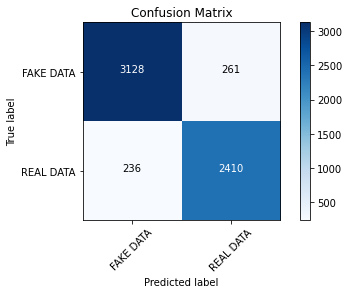

In [30]:
linear_clf.fit(X_train,y_train)
pred=linear_clf.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print(score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE DATA' , 'REAL DATA'])